https://www.datacamp.com/courses/manipulating-dataframes-with-pandas
# Case study: Summer Olympics

In [155]:
import pandas as pd
import numpy as np

In [156]:
medal = pd.read_csv('datasets/all_medalists.csv')
medal.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


In [157]:
medal[medal.NOC == 'USA'].head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold


### 1) to find the total number of medals awarded to the USA per edition

In [158]:
medal[medal.NOC=='USA'].groupby('Edition')['Medal'].count().head()

Edition
1896     20
1900     55
1904    394
1908     63
1912    101
Name: Medal, dtype: int64

### 2) df.value_counts( ): for ranking

In [159]:
medal.NOC.value_counts().head(3)

USA    4335
URS    2049
GBR    1594
Name: NOC, dtype: int64

### 3) df.pivot_table( ): to count medals by type

In [160]:
medal.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


In [161]:
m_pivot = medal.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')
m_pivot.head(3)

Medal,Bronze,Gold,Silver
NOC,,,
AFG,1.0,NaN,NaN
AHO,NaN,NaN,1.0
ALG,8.0,4.0,2.0


In [162]:
m_pivot['totals'] = m_pivot.sum(axis='columns')
m_pivot.head()

Medal,Bronze,Gold,Silver,totals
NOC,,,,
AFG,1.0,NaN,NaN,1.0
AHO,NaN,NaN,1.0,1.0
ALG,8.0,4.0,2.0,14.0
ANZ,5.0,20.0,4.0,29.0
ARG,88.0,68.0,83.0,239.0


In [163]:
m_pivot.sort_values('totals', ascending=False).head()

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0


### 4) Understanding the column labels

In [164]:
medal.head(2)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver


In [165]:
medal[['Event_gender', 'Gender']].drop_duplicates()

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


In [166]:
medal.groupby(['Event_gender', 'Gender']).count()

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

### 5) Locating suspicous data

In [167]:
medal[(medal.Event_gender == 'W') & (medal.Gender == 'Men')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


### 6) Counting distinct events

In [168]:
medal.Sport.unique() # 42 distinct types of sports

array(['Aquatics', 'Athletics', 'Cycling', 'Fencing', 'Gymnastics',
       'Shooting', 'Tennis', 'Weightlifting', 'Wrestling', 'Archery',
       'Basque Pelota', 'Cricket', 'Croquet', 'Equestrian', 'Football',
       'Golf', 'Polo', 'Rowing', 'Rugby', 'Sailing', 'Tug of War',
       'Boxing', 'Lacrosse', 'Roque', 'Hockey', 'Jeu de paume', 'Rackets',
       'Skating', 'Water Motorsports', 'Modern Pentathlon', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak', 'Handball', 'Judo', 'Volleyball',
       'Table Tennis', 'Badminton', 'Baseball', 'Softball', 'Taekwondo',
       'Triathlon'], dtype=object)

Both can be used with (axis='columns)
- idxmax( ): row or column label where max value is located
- idxmin( ): row or column label where min value is located

### 7) Compute the number of distinct sports in which each country won medals.

In [169]:
medal.groupby('NOC')['Sport'].nunique().sort_values(ascending=False).head(5)

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
Name: Sport, dtype: int64

### 7) Counting USA vs. USSR Cold War Olympic Sports

In [170]:
medal.head(3)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze


In [171]:
# Select the years during the cold war 1952-1988
coldwar = (medal.Edition >= 1952) & (medal.Edition <= 1988)
# extract the rows whose countries are 'USA' or 'USR'
countries = medal.NOC.isin(['USA', 'URS'])

In [172]:
medal.loc[coldwar & countries].groupby('NOC')['Sport'].nunique().sort_values(ascending=False)

NOC
URS    21
USA    20
Name: Sport, dtype: int64

### 8) Counting USA vs. USSR Cold War Olympic Medals

In [173]:
medal.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count').loc[1952:1988, ['USA', 'URS']].idxmax(axis='columns').value_counts()

URS    8
USA    2
dtype: int64

### 9) Line plots

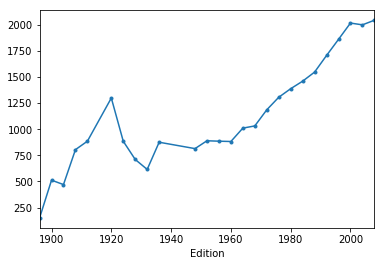

In [174]:
medal.groupby('Edition')['Athlete'].count().plot(kind='line', marker='.')
plt.show()

### 10) Grouping data of France

In [175]:
medal[medal.NOC == 'FRA'].groupby(['Edition', 'Medal'])['Athlete'].count().head()

Edition  Medal 
1896     Bronze     2
         Gold       5
         Silver     4
1900     Bronze    53
         Gold      46
Name: Athlete, dtype: int64

In [176]:
medal[medal.NOC == 'FRA'].groupby(['Edition', 'Medal'])['Athlete'].count().unstack().head()

Medal,Bronze,Gold,Silver
Edition,,,
1896,2.0,5.0,4.0
1900,53.0,46.0,86.0
1908,21.0,9.0,5.0
1912,5.0,10.0,10.0
1920,55.0,13.0,73.0


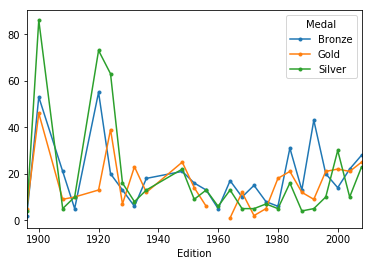

In [177]:
medal[medal.NOC == 'FRA'].groupby(['Edition', 'Medal'])['Athlete'].count().unstack().plot(kind='line', marker='.')
plt.show()

### 11) Visualizing USA Medal Counts by Edition: Line Plot

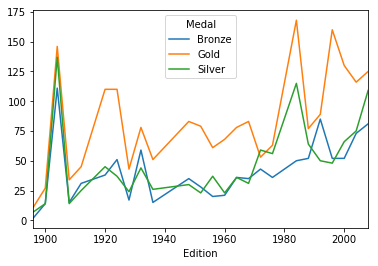

In [178]:
medal[medal.NOC=='USA'].groupby(['Edition', 'Medal'])['Athlete'].count().unstack(level='Medal').plot()

### 12) Visualizing USA Medal Counts by Edition: Area Plot

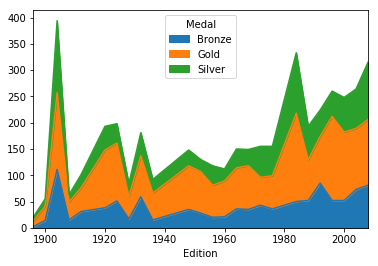

In [179]:
medal[medal.NOC=='USA'].groupby(['Edition', 'Medal'])['Athlete'].count().unstack(level='Medal').plot.area()

### 13) Visualizing USA Medal Counts by Edition: Area Plot with Ordered Medals

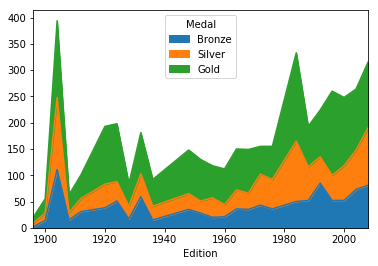

In [181]:
medal.Medal = pd.Categorical(values=medal.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)
medal[medal.NOC=='USA'].groupby(['Edition', 'Medal'])['Athlete'].count().unstack(level='Medal').plot.area()